# 4.3. Решения уравнения фильтрации с учетом скин-фактора и послепритока

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

версия 0.3 от 20.10.2022

--- 


Содержание

1. [Скин-фактор](#431)
2. [Граничные условия для скина](#432)
3. [Влияние ствола скважины. Послеприток к скважине ](#433)
4. [Решение в пространстве Лапласа с учетом скин-фактора и послепритока](#434)
5. [Построение решений с использованием python](#435)

# 1 Скин-фактор <a class="anchor" id="431"></a>

Скин-фактор — гидродинамический параметр скважины, характеризующий дополнительное фильтрационное сопротивление течению флюидов в призабойной зоне, приводящее к изменению добычи (дебита) по сравнению с совершенной (идеальной) скважиной. Скин фактор может приводить как к снижению дебита (например при загрязнении ПЗС), так и увеличению (образование высокопроводящих каналов в ПЗС).

Концепция скин-фактора получила широкое распространение на практике. Все инженеры-нефтяники знают этот параметр и оперируют им на практике (это не точно).

Скин-фактор описывает изменение проницаемости призабойной зоны, которое может быть вызвано различными факторами, среди которых:
* Проникновение бурового раствора в призабойную зону при строительстве скважины
* Набухание глин при контакте с фильтратом бурового раствора при строительстве скважины
* Химическое осаждение нерастворимого осадка из фильтруемых флюидов в призабойной зоне, например отложение солей или асфальтенов при эксплуатации 
* Продвижение песчаных частиц к стволу скважины при эксплуатации
* Повреждение породы при перфорации при проведении текущего или капитального ремонта 
* и многими другими причинами

### Формула Хокинса - выражение скин фактора через радиус загрязненной зоны
Скин - фактор для плоскорадиального установившегося потока несжимаемой жидкости:

$$S =\left( \frac{k}{k_s} -1\right)\ ln\frac{r_s}{r_w} \tag{1}$$

* $k_s$ - проницаемость в загрязненной ПЗП
* $k$ - однородная проницаемость по всему пласту
* $r_s$ - радиус загрязненной зоны
* $r_w$ - радиус скважины

### Скин - безразмерный перепад давления

$$ S = \Delta p_{skin} \dfrac{kh}{18.41 q_{sf} \mu} \tag{2}$$

* $S$ - скин
* $\Delta p_{skin}$ - перепад давления за счет скин-фактора
* $k$ - проницаемость, мД
* $h$ - эффективная мощность пласта, м
* $q_{sf}$ - дебит на забое, м$^3$/сут
* $\mu $ - вязкость, сП

### Эквивалентный радиус скважин для скин-фактора
Скин-фактора во всех расчетах можно заменить на эквивалентный радиус скважины. Идея заключается в том, что изменение проницаемости в призабойной зоне скважины можно представить как измененный радиус скважины в пласте постоянной проницаемости. Такой вариант работает и для положительных и для отрицательных значений скин-фактора, что иногда бывает удобно с вычислительной точки зрения
$$ S = -\ln \left(\dfrac{r_{eff.w}}{r_w} \right) $$
или
$$ r_{eff.w} = r_w e^{-S} $$

* $r_{eff.w}$ - Эффективный радиус скважины,м
* $r_{w}$ -  радиус скважины,м
* $S$ - скин

### Скин фактор в формуле Дюпюи (стационарное решение)

$$(p_e - p_{wf}) = \frac{18.41\mu q }{\ k h}(\ln\frac{r_e}{r_w}+S) $$

Продуктивность скважины определяется как:

$$J_{ss} = \frac{q_s}{p_e - p_{wf}} = \frac{k h}{18.41\mu B(\ ln\dfrac{r_e}{r_w} + S)} $$

### Скин фактор и нестационарное решение

$$ p(r, t) = p_{i} - \frac {9.205\mu {q_s} B }{k h}(\ ln\frac {k t}{ \phi \mu {c_t} {r^2}} +7.12 + 2S) $$

# 2. Решение со скин фактором в пространстве Лапласа <a class="anchor" id="432"></a>


* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 $$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0$$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 1} {r_D \frac{\partial p_D}{\partial r_D}} = -1$$

Считая, что скин фактор действует в призабойной зоне скважины, размер которой пренебрежимо мал можно записать выражение для забойного давления скважины в виде

$$ p_{wfD} = p_D + S$$

Общее решение имеет вид


$$ \tilde{p}_D(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) $$

Частное решение решение с учетом скин-фактоh послепритока можно представить в виде

$$
\tilde{p}_{wbD}(u) = \frac{S}{u} + \tilde{p}_D(r_d=1,u) 
$$

где $\tilde{p}_D(r_d=1,u)$ - известное частное решение

# 3. Влияние ствола скважины. Послеприток к скважине <a class="anchor" id="433"></a>

Чаще всего управление дебитом скважины происходит на поверхности - на скважинной арматуре. Регулируя задвижки можно открыть - запустить скважину или остановить работу скважины. Замер дебита также проводится измерительным устройством на поверхности. При этом строя решения уравнения фильтрации мы описываем работу пласта и предполагаем, что знаем дебит именно пласта - дебит на границе соединения скважины с пластом. Объем ствола скважины и сжимаемость флюида в скважине могут привести к тому, что показатели притока на забое и на поверхности будут отличаться, особенно на переходных режимах работы. Именно этот эффект учитывается моделями ствола скважины или моделя послепритока (wellbore storage or afterflow). 

Самая простая модель предполагает постоянную сжимаемость ствола скважины. Для ее описания вводится коэффициент влияния ствола скважины

$$C=V_wc_w = \dfrac{\Delta V}{\Delta P}$$
где
* $C$ - коэффициент влияния ствола скважины, м$^3$/атм
* $V_w$ - объем ствола скважины, м$^3$
* $c_w$ - сжимаемость флюда (газожидкостной смеси) в стволе скважины, 1/атм
* $\Delta V$ - изменение объема флюида в скважине, м$^3$
* $\Delta P$ - изменение давления в скважина, атм

Коэффициент ствола скважины легко выразить для некоторых случаев.
* Для нагнетательной скважины 

$$C=V_wc_w $$

* Для фонтанирующей нефтяной скважины

$$C=V_lc_l + \dfrac{ V_g}{P_g} $$

* Для механизированной скважины с динамическим уровнем

$$C = f\dfrac{A}{\rho g}$$

здесь
* $C$ - коэффициент влияния ствола скважины, м$^3$/атм
* $V_w$ - объем ствола скважины, м$^3$
* $c_w$ - сжимаемость воды в стволе скважины, 1/атм
* $V_l$ - объем жидкости в стволе фонтанирующей скважины, м$^3$
* $c_l$ - сжимаемость жидкости в стволе фонтанирующей скважины, 1/атм
* $V_g$ - объем газа  в стволе фонтанирующей скважины, м$^3$
* $P_g$ - давление газа в стволе фонтанирующей скважины, атм
* $A$ - площадь внутреннего сечения ствола скважины, м$^2$
* $\rho$ - плотность жидкости в стволе скважины, кг/м$^3$
* $g$ - ускорение свободного падения, м/сек$^2$
* $f$ - переводной коэффициент для согласования размерностей $f=101325$

Используя приведенные соотношения можно оценить величины коэффициента послепритока для разных случаев

* Для нагнетательной скважины 

$$C=V_wc_w = 30 \cdot 4.5\cdot10^{-5} = 1.35\cdot10^{-5} [м^3/атм] $$

* Для фонтанирующей нефтяной скважины

$$C=V_lc_l + \dfrac{ V_g}{P_g} = 29 \cdot 5\cdot10^{-5} + 1 \cdot \dfrac{1}{100} = 0.01 [м^3/атм] $$

* Для механизированной скважины с динамическим уровнем

$$C = f\dfrac{A}{\rho g} = \dfrac{101325 \cdot 0.015}{9.8 \cdot 800} = 0.2 [м^3/атм]$$

Для связи дебита скважины на поверхности $q_{wh}$ и на забое $q_{sf}$ можно получить выражение

$$
q_{sf} = q_{wh}B + 24 C\dfrac{dP_{wf}}{dt} 
$$ 

где
* $q_{sf}$ - дебит на забое скважины, м$^3$/сут
* $q_{wh}$ - дебит на устье скважины м$^3$/сут
* $dP_{wf}$ - изменение забойного давления, атм
* $dt$ - изменение времени, час
* $C$ - коэффициент влияния ствола скважины, м$^3$/атм
* $B$ - объемный коэффициент нефти

# 4. Решение в пространстве Лапласа с учетом скин-фактора и послепритока <a class="anchor" id="434"></a>

Рассматривается уравнение фильтрации в безразмерных переменных 

$$ \frac{\partial p_D}{ \partial t_D} = \frac{1}{r_D}\left[ \frac{ \partial{}}{ \partial{r_D} }\left( r_D \dfrac{\partial p_D}{ \partial r_D} \right) \right]  $$

вводятся следующие безразмерные переменные
* $r_D$ - безразмерное расстояние от центра скважины
* $t_D$ - безразмерное время
* $p_D$ - безразмерное давление

Соответствующие определения безразмерных переменных

$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{kh}{ 18.41 q B \mu} \left( p_i - p \right) $$

где в свою очередь 
* $q$ - дебит скважины на поверхности, приведенный к нормальным условиям, м3/сут
* $\phi$ - пористость, доли единиц
* $\mu$ - вязкость нефти в пласте, сП
* $B$ - объемный коэффициент нефти, м3/м3
* $p_i$ - начальное давление в пласте, атм
* $p$ - давление забойное, атм
* $c_t$ - общая сжимаемость системы в пласте, 1/атм
* $k$ - проницаемость, мД
* $t$ -  время, час
* $r$ - расстояние от центра скважины, м
* $r_w$ - радиус скважины, м

дополнительно вводим

$$ q_D = \frac{ q_{sf} }{qB} $$

* $q_D$ - безразмерный дебит на поверхности. Нормириуется на произвольный дебит $q$
* $q_{sf}$ - дебит на поверхности. Может меняться для задачи постоянного дебита из пласта

$$ C_D = 0.159 \dfrac{C}{h\phi \mu c_t r_w^2}$$

* $C_D$ - безразрмерный коэффициент влияния скважины

## Граничные условия для конечного радиуса скважины


* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 $$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 1} {r_D \frac{\partial p_D}{\partial r_D}} = -1$$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0$$

Общее решение имеет вид


$$ \tilde{p}_D(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) $$

Частное решение соответсвующее приведенным условиям будет иметь вид


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s  \right) }{K_1 \left(  \sqrt s  \right)} $$

где 

$K_0$, $K_1$ - <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%91%D0%B5%D1%81%D1%81%D0%B5%D0%BB%D1%8F"
                        target="_blank" rel="noreferrer noopener">модифицированные функции Бесселя&nbsp;</a>

## Граничные условия для скина и послепритока


* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 $$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0$$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 1} {r_D \frac{\partial p_D}{\partial r_D}} = -q_D$$

где

$$ q_D = 1-C_D \dfrac{dp_{wfD}}{dt_D} $$

где
$$ p_{wfD} = p_D + q_D S$$

Общее решение имеет вид


$$ \tilde{p}_D(u, r_D) = A(u) K_0(r_D \sqrt u) + B(u) I_0(r_D \sqrt u) $$

Частное решение решение с учетом скин-фактор и послепритока можно представить в виде

$$
\tilde{p}_{wbD}(s) = \frac{1}{s} \left[ \frac{S + s \tilde{p}_D(r_d=1,s) }{1 + s C_D (S + s \tilde{p}_D(r_d=1,s))} \right]
$$

где $\tilde{p}_D(r_d=1,s)$ - известное частное решение

# 5. Построение решений с использованием python  <a class="anchor" id="435"></a>

In [1]:
# импортируем библиотки, которые могут пригодиться для проведения расчетов
import numpy as np
import matplotlib.pyplot as plt
from anaflow import get_lap_inv


from scipy.special import kn, expi

In [2]:
# пример функции реализующий расчет решения в пространстве Лапласа
def pd_lapl_line_source(u, rd=1):
    """
    расчет решения линейного стока для безразмерного давления в пространстве Лапласа
    u - переменная пространства Лапласа
    rd- безразмерное расстояние от центра скважины
    """
    return 1 / u * kn(0, rd * u**0.5)

# пример функции реализующий расчет решения в пространстве Лапласа
def pd_lapl_finite_rw(u, rd=1):
    """
    расчет решения c конечным радиусом скважины для безразмерного давления в пространстве Лапласа
    u - переменная пространства Лапласа
    rd- безразмерное расстояние от центра скважины
    """
    return 1 / u**(3/2) * kn(0, rd * u**0.5) / kn(1, u**0.5)

In [3]:
# пример расчета с использованием функции в пространстве Лапласа
print(pd_lapl_line_source(1, 1))

0.42102443824070834


In [4]:
# решение линейного стока в пространстве Лапласа
def pd_lapl_wbs(pd_lapl):
    def pdl(s, rd, S=0, Cd=0):
        pds = S + s * pd_lapl(s, rd=rd)
        return 1 / s * pds / (1 + s * Cd * pds)
    return pdl

In [5]:
# построим функцию инвертирующую решение в пространстве Лапласа

# функция расчета безразмерного давления с использованием алгоритма Стефеста
# для численного обратного преобразования Лапласа
def pd_inv(pd_lapl, td, rd, **kwargs):
     
    
    if isinstance(rd, np.ndarray):
        # если на входе массив, то вручную итерируем по всем элементам и 
        # собираем массив массивов
        return np.array(list(map(lambda r: pd_inv(pd_lapl, td, rd=r, **kwargs), rd)))
    else:
        pd_inv_ = get_lap_inv(pd_lapl, rd=rd, **kwargs)
        return pd_inv_(td)

In [6]:
pd_inv(pd_lapl_wbs(pd_lapl_finite_rw), td=1, rd=1, S=1)

array([1.80214473])

In [7]:
pd_inv(pd_lapl_wbs(pd_lapl_finite_rw), td=1, rd=np.array([1, 2]), S=2)

array([[2.80214473],
       [2.22038795]])

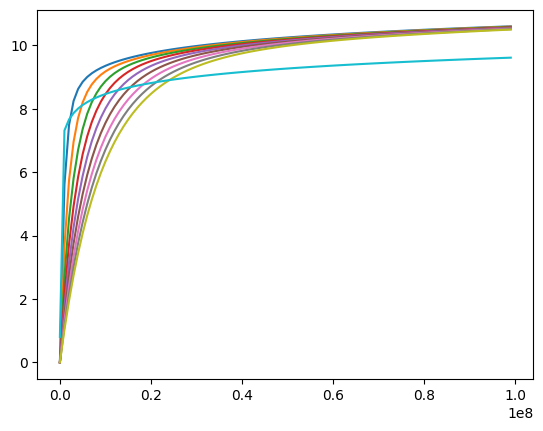

In [8]:
t_d = np.arange(1, 1e8, 1e6)
r_d = 1
S = 1
C_d = 100000 
p_d_1 = pd_inv(pd_lapl_finite_rw, td=t_d, rd=r_d)


fig, ax = plt.subplots(1,1)

clist = np.arange(1,10,1)
for ci in clist:
    p_d_2 = pd_inv(pd_lapl_wbs(pd_lapl_finite_rw), td=t_d, rd=r_d, S=S, Cd=ci*C_d)
    plt.plot(t_d, p_d_2)

#ax.set_xscale('log')
plt.plot(t_d, p_d_1)
plt.show()


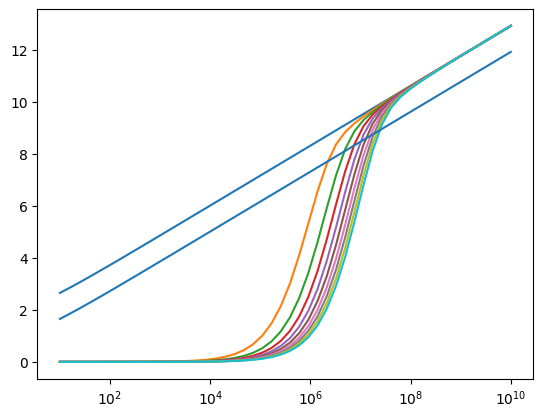

In [9]:
t_d = np.logspace(1, 10)
r_d = 1
S = 1
C_d = 10000 
p_d_1 = pd_inv(pd_lapl_finite_rw, td=t_d, rd=r_d)

fig, ax = plt.subplots(1,1)

clist = np.arange(0,100,10)
for ci in clist:
    p_d_2 = pd_inv(pd_lapl_wbs(pd_lapl_finite_rw), td=t_d, rd=r_d, S=S, Cd=ci*C_d)
    plt.plot(t_d, p_d_2)

ax.set_xscale('log')
plt.plot(t_d, p_d_1)
plt.show()


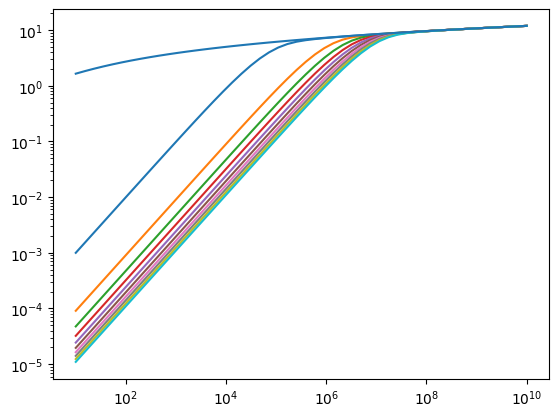

In [10]:
t_d = np.logspace(1, 10)
r_d = 1
S = 0
C_d = 10000 
p_d_1 = pd_inv(pd_lapl_finite_rw, td=t_d, rd=r_d)


fig, ax = plt.subplots(1,1)

clist = np.arange(1,100,10)
for ci in clist:
    p_d_2 =  pd_inv(pd_lapl_wbs(pd_lapl_finite_rw), td=t_d, rd=r_d, S=S, Cd=ci*C_d)
    plt.plot(t_d, p_d_2)

ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(t_d, p_d_1)
plt.show()